In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Data Understanding, Cleaning, Visualizations

In [20]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Insights : The dataset contains 200 customer records with 5 variables: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1–100).The data don't have missing values, and most variables are numeric, except for Gender, which is categorical.

In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Insights : The average customer age is 38.85 years, ranging from 18 to 70, indicating a balanced mix of young and older adults. The average annual income is 60,560, with values between 15,000 and 137,000, showing a wide variation in income levels. The average spending score is 50.2, ranging from 1 to 99, which suggests diverse spending behaviors among customers — some spend very little, while others spend substantially more. The relatively high standard deviations for income ≈26.26 and spending score ≈25.82 further highlight this variability, indicating significant differences in both earning and spending capacity. Additionally, the median spending score of 50 reveals that half of the customers exhibit moderate spending behavior.


In [23]:
# rename the Annual Income & Spending Score	column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175,

Insights : The dataset shows no anomalous values in any of the columns. All variables including Age, Annual Income, and Spending Score within reasonable and expected ranges, indicating that the data is clean and consistent.


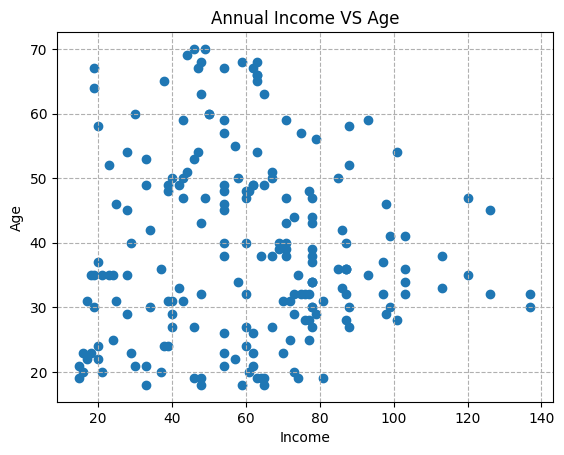

In [25]:
plt.scatter(df['AnnualIncome'], df['Age'])
plt.title('Annual Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

Insights : The scatter plot between Income and Age shows no clear correlation between the two variables, as the data points are widely dispersed across the chart. This indicates that income does not consistently increase or decrease with age. Customers of various age groups exhibit a wide range of income levels, suggesting that both younger and older individuals can have either low or high incomes. Most customers appear to earn between 40,000 and 80,000 annually, regardless of age. A few outliers with incomes above 100,000 are also observed across different ages.


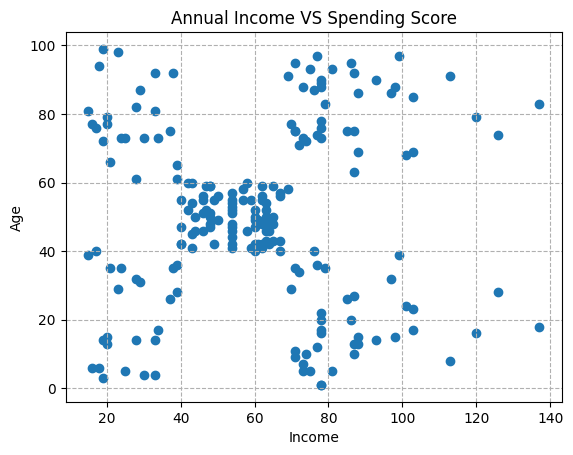

In [26]:
plt.scatter(df['AnnualIncome'], df['SpendingScore'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

Insights : The scatter plot between Annual Income and Spending Score shows that there is no strong linear relationship between income and spending behavior. Customers with similar income levels exhibit a wide range of spending scores, indicating that spending habits are not solely determined by income. For example, individuals with moderate annual incomes around $80,000 display both low and high spending scores, suggesting different consumer behaviors within the same income bracket. Additionally, there appear to be distinct clusters in the plot, which may represent different customer segments — such as high-income low-spending customers, high-income high-spending customers, and low-income high-spending customers.


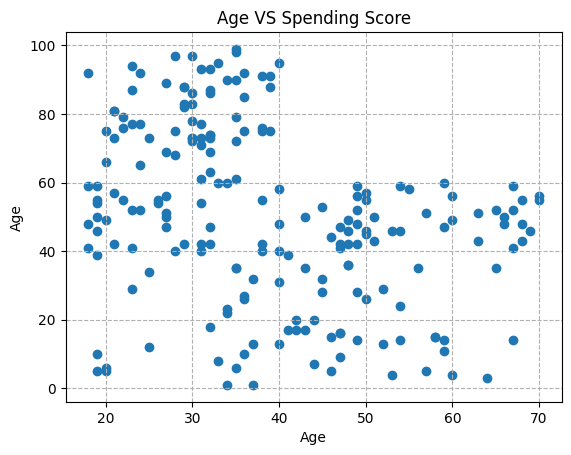

In [50]:
plt.scatter(df['Age'], df['SpendingScore'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

Insights : The scatter plot between Age and Spending Score indicates that there is no clear linear relationship between age and spending behavior. Customers with similar age show a wide variation in spending scores, implying that higher income does not necessarily lead to higher spending. Most customers fall within age 20-70, and their spending scores are scattered across all levels, suggesting diverse consumer behaviors within the same age brackets. The plot also shows a few clusters, where some groups with moderate age have either high or low spending scores.


In [28]:
# create new dataframe that consist only gender, age, annual income & spending score
df = df[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']]
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Data Transformation

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: gender

one_hot_map = {
    'Gender': {'Male': 0, 'Female': 1}
}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)

df.sample(n = 5)

,Gender,Age,AnnualIncome,SpendingScore
176,0,58,88,15
122,1,40,69,58
121,1,38,67,40
93,1,40,60,40
146,0,48,77,36


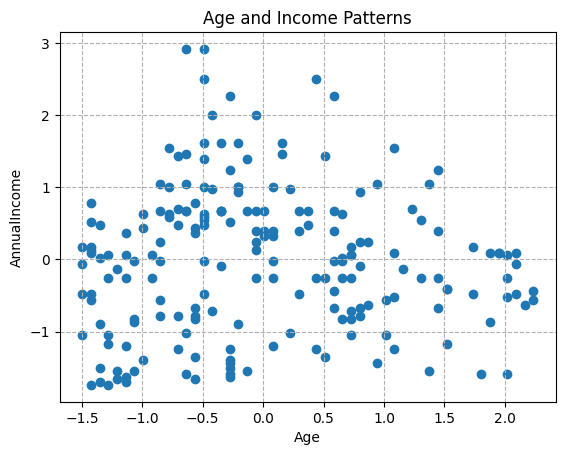

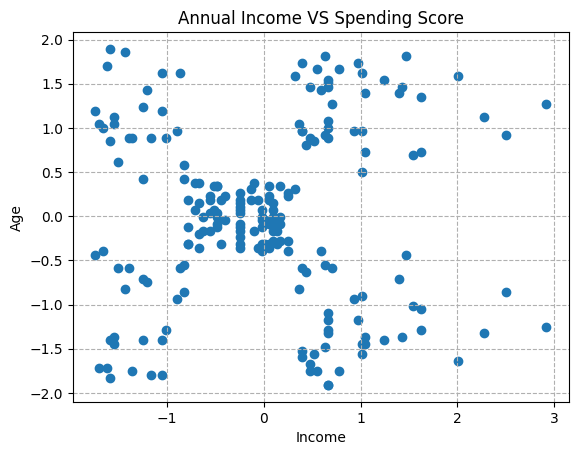

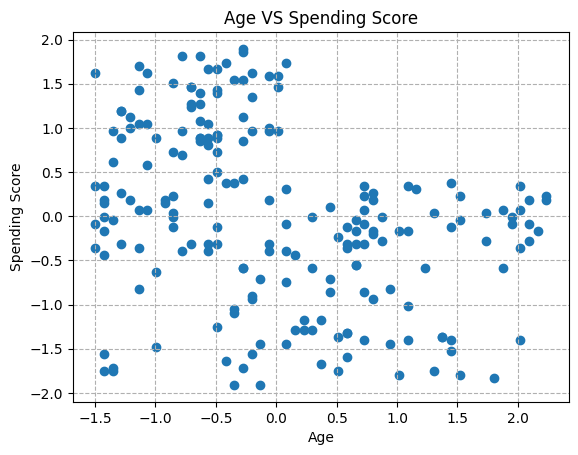

In [51]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']]), columns=["Age", "AnnualIncome", "SpendingScore"])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["AnnualIncome"])
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

plt.scatter(df_sc_scaled['AnnualIncome'], df_sc_scaled['SpendingScore'])
plt.title('Annual Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

plt.scatter(df_sc_scaled['Age'], df_sc_scaled['SpendingScore'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

Insights : The use of StandardScaler in this dataset is essential because the features Age, AnnualIncome, and SpendingScore have different numerical ranges. For instance, Age ranges from around 18 to 70, AnnualIncome ranges from 15,000 to 137,000, while SpendingScore only ranges from 1 to 99. Without scaling, features with larger numeric values, such as AnnualIncome, would dominate distance-based calculations used in algorithms like K-Means. This would cause the model to give more importance to income than to age or spending behavior, leading to biased results. By applying StandardScaler, all features are standardized to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis. As a result, the clustering or visualization outcomes become more accurate, balanced, and meaningful.


# Choosing K


In [34]:
from sklearn.cluster import KMeans

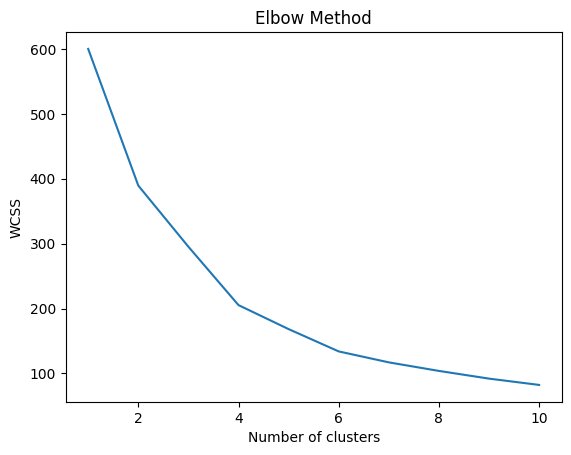

In [46]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


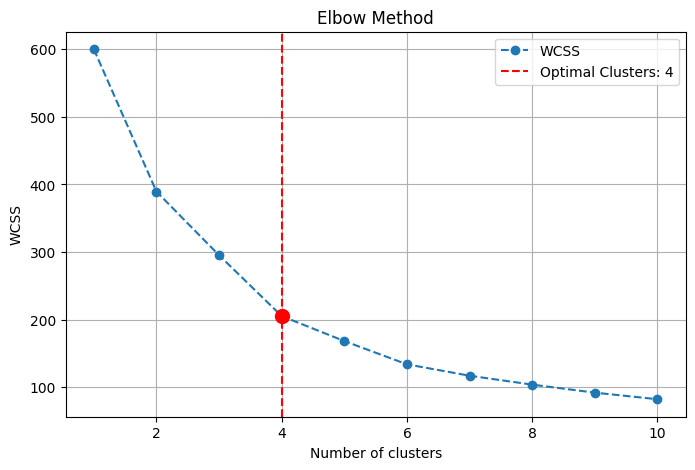

The optimal number of clusters is: 4


In [48]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Based on the Elbow Method, the optimal number of clusters for this dataset appears to be 4. The plot shows a clear bend or "elbow" at this point, indicating that adding more clusters beyond four does not significantly reduce the Within-Cluster Sum of Squares (WCSS), which measures the compactness of the clusters. While the WCSS continues to decrease with more clusters, the rate of decrease diminishes considerably after four, suggesting that four clusters provide a good balance between minimizing WCSS and avoiding overfitting.

# Modeling with K-Means

In [53]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,AnnualIncome,SpendingScore,KMeans_Cluster
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


/tmp/ipython-input-366769702.py:4: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Age", y = "AnnualIncome", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


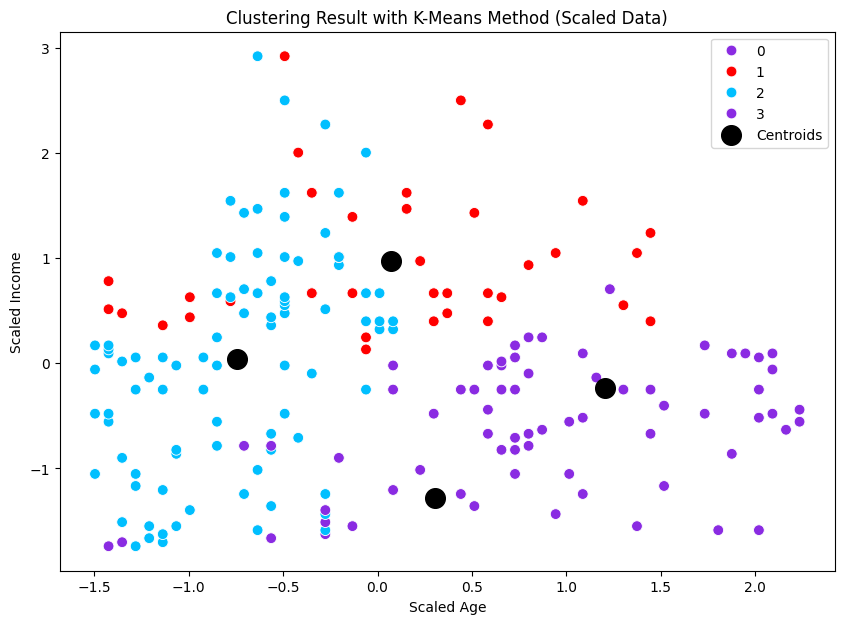

/tmp/ipython-input-366769702.py:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


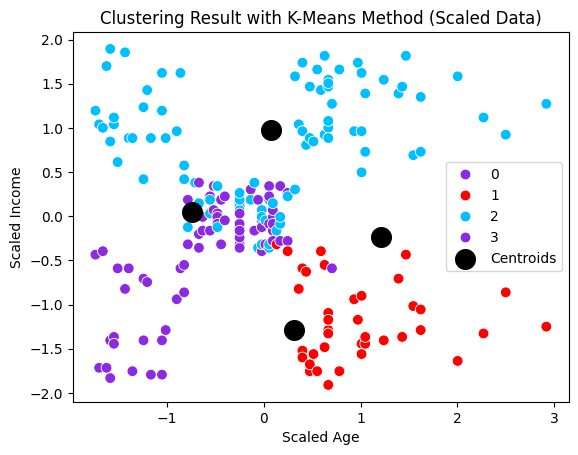

/tmp/ipython-input-366769702.py:20: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)


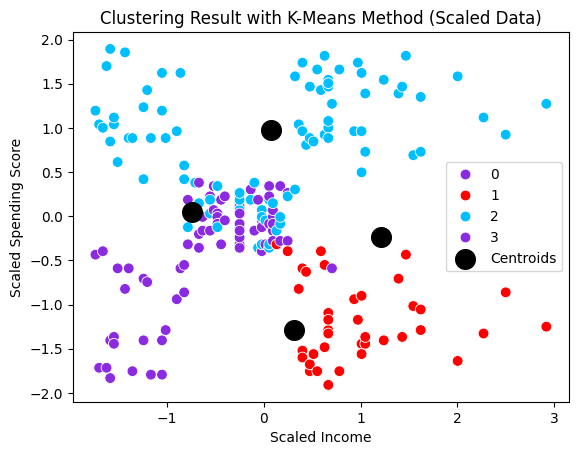

In [54]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "AnnualIncome", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

sns.scatterplot(x = "AnnualIncome", y = "SpendingScore", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

Insights :
*   **Cluster 0 (Purple):** This cluster appears to represent older customers with moderate annual income and average spending scores.
*   **Cluster 1 (Red):** This cluster seems to be composed of customers with high annual income but low spending scores. These could be customers who earn a lot but are frugal or save more.
*   **Cluster 2 (Blue):** This cluster consists of younger to middle-aged customers with varying annual incomes but high spending scores. These could be impulse buyers or those with a higher disposable income and willingness to spend.
*   **Cluster 3 (Cyan):** This cluster includes younger to middle-aged customers with low annual income and low spending scores. These could be budget-conscious customers or those with limited income.

These clusters suggest different customer segments with unique spending behaviors and income levels, which can be valuable for targeted marketing strategies.

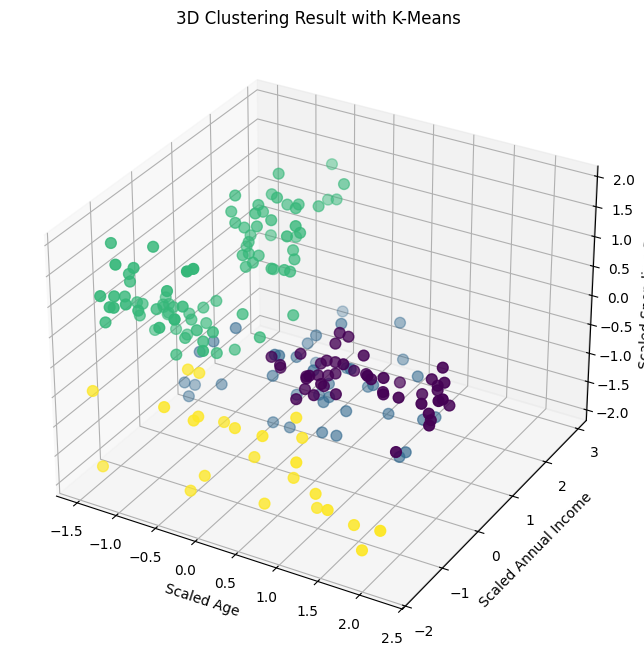

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use the scaled data for visualization
x = df_sc_scaled['Age']
y = df_sc_scaled['AnnualIncome']
z = df_sc_scaled['SpendingScore']

# Use the cluster labels for coloring
colors = clusters

ax.scatter(x, y, z, c=colors, cmap='viridis', s=60)

ax.set_xlabel('Scaled Age')
ax.set_ylabel('Scaled Annual Income')
ax.set_zlabel('Scaled Spending Score')
ax.set_title('3D Clustering Result with K-Means')

plt.show()

Insights :
*   **Cluster 0:** This cluster has a higher average age (55.6) and moderate average annual income (54.4k) and spending score (48.9). This aligns with the observation that this cluster represents older, average-spending customers.
*   **Cluster 1:** This cluster has a moderate average age (39.9) and the highest average annual income (86.1k) but the lowest average spending score (19.4). This confirms the idea of high-income, low-spending customers.
*   **Cluster 2:** This cluster has the lowest average age (28.5) and a moderate average annual income (61.7k) but the highest average spending score (71.8). This group appears to be younger customers who are high spenders.
*   **Cluster 3:** This cluster has a moderate average age (43.1) and the lowest average annual income (27.0k) and a low average spending score (22.1). This aligns with the representation of lower-income, lower-spending customers.

These insights from the summary table reinforce the visual observations from the scatter plots and provide a more quantitative understanding of each customer segment.

# Cluster Profiling & Insights

In [65]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Gender': [lambda x: x.mode()[0] if not x.mode().empty else None, 'min', 'max'],
                                              'Age': ['mean', 'min', 'max'],
                                              'AnnualIncome': ['mean', 'min', 'max'],
                                              'SpendingScore': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

# Rename the lambda column to 'mode'
cluster_summary.rename(columns={'<lambda_0>': 'mode'}, level=1, inplace=True)

cluster_summary

Gender                Age         AnnualIncome           \
                 mode min max       mean min max         mean min  max   
KMeans_cluster                                                           
0                   1   0   1  55.638298  40  70    54.382979  38   79   
1                   0   0   1  39.871795  19  59    86.102564  64  137   
2                   1   0   1  28.500000  18  40    61.677778  15  137   
3                   1   0   1  43.125000  19  67    26.958333  15   40   

               SpendingScore          
                        mean min max  
KMeans_cluster                        
0                  48.851064  35  60  
1                  19.358974   1  42  
2                  71.766667  41  99  
3                  22.083333   3  42

## **Managerial Implications Based on the Four Clusters**

### **Cluster 0 — Older / Mid-Income Customers**

**Profile:**

* Average age around 56 years old, ranging from 40–70.
* Moderate income (~$54K average).
* Average spending score (~49): balanced spending behavior.
* Likely represents mature female adults with steady income and moderate lifestyle preferences.

**Implications:**

* Offer mid-range product that balance quality and affordability.
* Focus on comfort, reliability, and practicality in product design and messaging.
* Promote through traditional channels (email, loyalty programs) rather than social media.
* Encourage repeat purchases through exclusive offers or member benefits.

### **Cluster 1 — Mature / High-Income but Low-Spending Consumers**

**Profile:**

* Age around 40 years old, range 19–59.
* Highest income ($86K average) but lowest spending score (19).
* Likely consists of financially stable male professionals who are cautious or selective in spending.

**Implications:**

* Focus marketing on premium quality and exclusivity to justify higher prices.
* Use personalized communication emphasizing long-term value and status.
* Introduce premium loyalty programs or high-tier memberships.
* Educate them about product benefits — they value rational, not impulsive, buying.


### **Cluster 2 — Young / High-Spending Customers**

**Profile:**

* Youngest group, average age ~28 years old.
* Moderate income ($61K) but highest spending score (72).
* Likely early-career female individuals who are socially active and lifestyle-driven.

**Implications:**

* Offer trendy, fashionable, or experience-oriented products.
* Use social media, influencer, and online campaigns for engagement.
* Introduce subscription plans or rewards programs to build loyalty.
* Emphasize aspiration and self-expression in marketing messages.

### **Cluster 3 — Middle-Aged / Low-Income and Low-Spending Customers**

**Profile:**

* Average age around 43 years old.
* Lowest income ($27K) and low spending score (22).
* Likely represents budget-conscious female consumers with limited purchasing capacity.

**Implications:**

* Focus on affordable, practical, and essential products.
* Offer discounts, bundles, or financing options to encourage purchases.
* Build trust through clear value communication and consistent service quality.
* Suitable for mass-market or promotional campaigns targeting affordability.
